# Ahmed Sharaf
##  Numerical Optmization 
###         1 - Implementation  The Gradient Descent (Single Variable)


In [95]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
def g_descent(X, y, n_iter = 1000, lr = 0.001):
    n_obser = len(X)
    theta_zero, theta_one = 0, 0
    
    # Store Loss And Parameter Theta
    losess = []
    theta_all_zero = []
    theta_all_one = []
    
    for i in range(n_iter):
        # Store Theta Parameter
        theta_all_zero.append(theta_zero)
        theta_all_one.append(theta_one)

        # Model predict
        h = theta_zero + theta_one * X

        # Evaluation Error
        error_vector = h - y
        J = np.sum(error_vector ** 2) / (2 * n_obser)

        #Save Cost
        losess.append(J)

        # Calculate Gradient
        grade_zero = np.sum(error_vector) / n_obser
        grade_one = np.sum(error_vector * X) / n_obser

        # Calaculate Norm Of Grade
        norm_grade = np.linalg.norm(np.array([grade_zero, grade_one]))

        # Check Converge
        if norm_grade < 0.0001 or ((i != 0) and (abs(losess[i - 1] - J) < 0.0001)):
            break

        # Update Parameters
        theta_zero = theta_zero - lr * grade_zero
        theta_one = theta_one - lr * grade_one
        
    # Final Prediction
    y_pred = theta_zero + theta_one * X 
    return theta_zero, theta_one, theta_all_zero, theta_all_one, losess, y_pred

### Example

In [97]:
X = np.array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019, 6.9000001 , 6.0999999 , 6.19999981, 6. , 5.0999999 , 4.69999981, 4.4000001 , 5.80000019])
y = np.array([4., 7.4000001 , 5., 7.19999981, 7.9000001 ,6.0999999 , 6., 5.80000019, 5.19999981, 4.19999981,4. , 4.4000001 , 5.19999981])

In [98]:
t0, t1, at0, at1, c, h = gd_descent(X, y, n_iter=1000, lr=0.001)

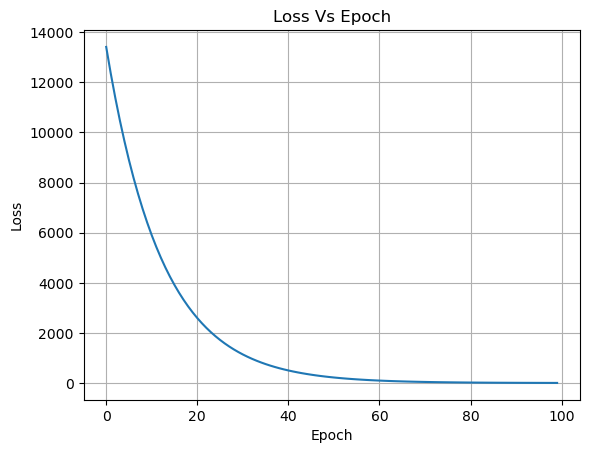

In [110]:
plt.plot(c[:100])
plt.xlabel("Epoch")
plt.ylabel("Loss");
plt.title("Loss Vs Epoch")
plt.grid()

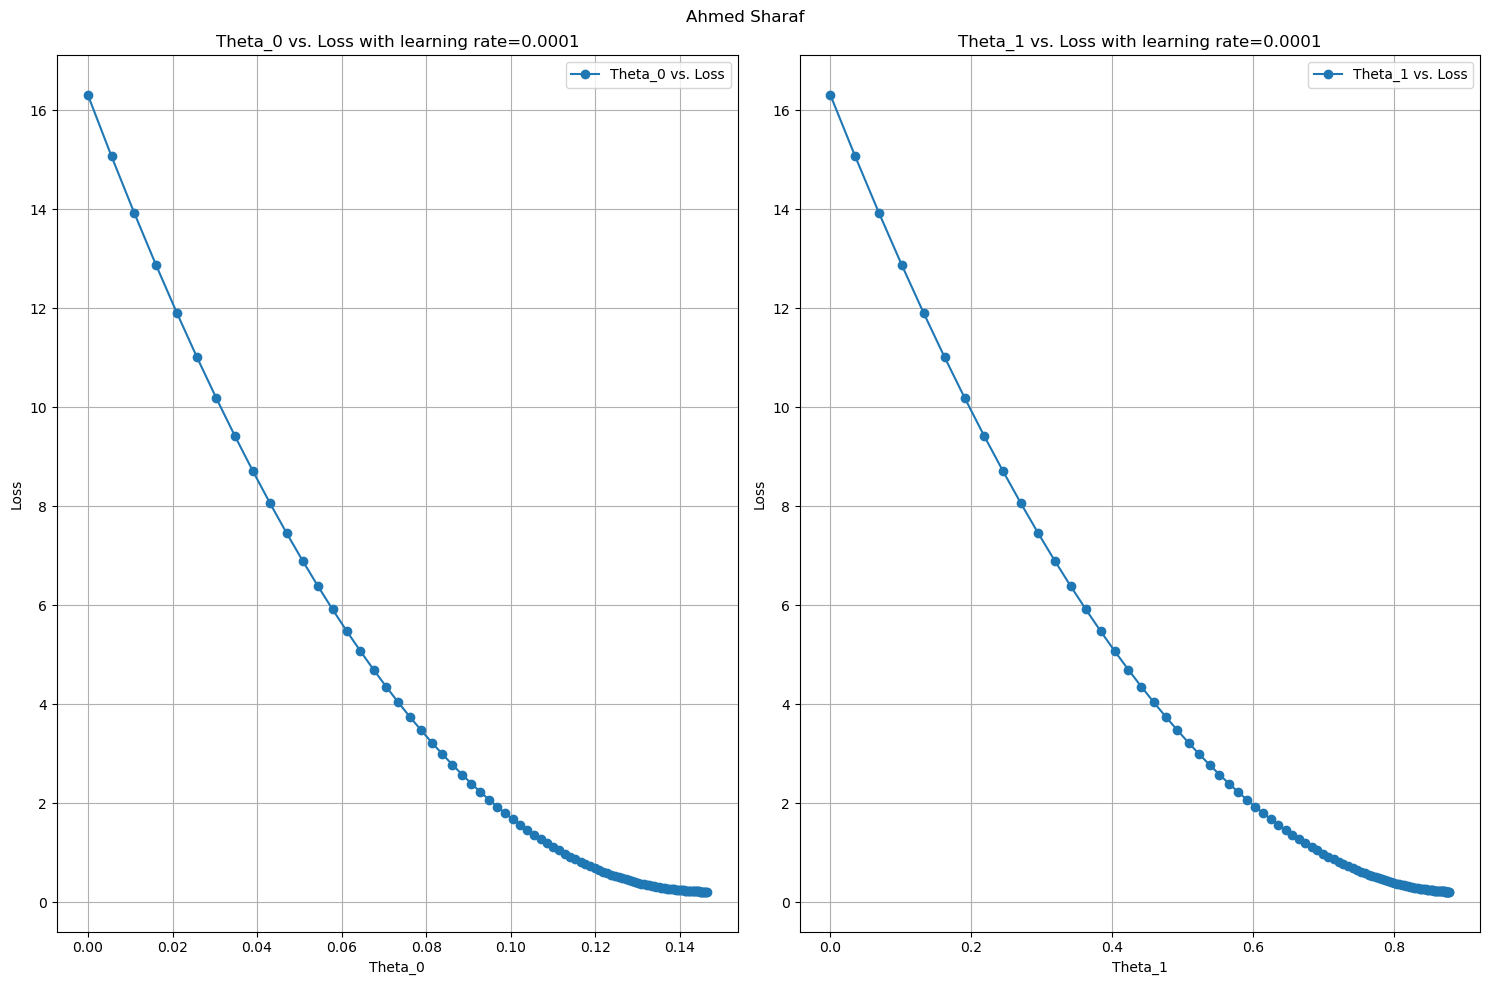

In [100]:
at = [at0, at1]
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15, 10)
fig.suptitle('Ahmed Sharaf')

for i in range(2):
    axs[i].plot(at[i][:100], c[:100], '-o', label=f'Theta_{i} vs. Loss')
    axs[i].set_title(f'Theta_{i} vs. Loss with learning rate=0.0001')
    axs[i].set_xlabel(f'Theta_{i}')
    axs[i].set_ylabel('Loss')
    axs[i].legend()
    axs[i].grid(True)
        
fig.tight_layout()


### Example

###         2 - Implementation  The Gradient Descent (Multiple Variable)


In [101]:
def g_descent_mv(X, y, n_iter = 100000, lr = 0.0001):
    m = len(X)
    ones = np.ones((m,1))
    X2 = np.concatenate((ones,X),axis=1)
    y2 = y.reshape(-1, 1)
    
    thetas = np.zeros((X.shape[1] + 1, 1))

    losses = []
    all_thetas = []

    for i in range(n_iter):
        #Store Thetas
        all_thetas.append(thetas)

        #Model Predict
        h = X2@thetas

        # Eval Cost Function
        error_vector = h - y2
        J = np.sum(error_vector ** 2) / (2*m)
        losses.append(J)

        # Calculate Gradient Vector
        grade = (X2.T@error_vector) / m

        # Calculate Nome And Check
        norm_grade = np.linalg.norm(grade)
        if norm_grade < 0.2 or ((i != 0) and (abs(losses[i - 1] - J) < 0.000001)):
            break

        #Update Thetas
        thetas = thetas - lr * grade
        
    y_predict = X2@thetas
    return thetas, all_thetas, losses, y_predict

In [102]:
data = np.array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [103]:
X = data[:,:3]
y = data[:,3]

In [104]:
theta , at, c , h= g_descent_mv(X, y)

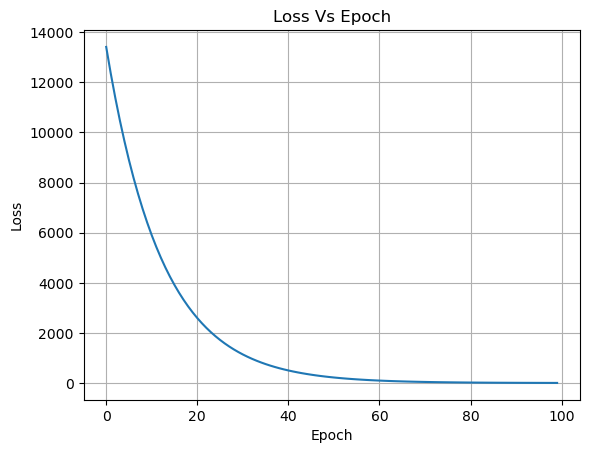

In [108]:
plt.plot(c[:100])
plt.xlabel("Epoch")
plt.ylabel("Loss");
plt.title("Loss Vs Epoch")
plt.grid()

In [106]:
theta_0 = np.array(at)[:, 0].reshape(-1, 1)
theta_1 = np.array(at)[:, 1].reshape(-1, 1)
theta_2 = np.array(at)[:, 2].reshape(-1, 1)
theta_3 = np.array(at)[:, 3].reshape(-1, 1)

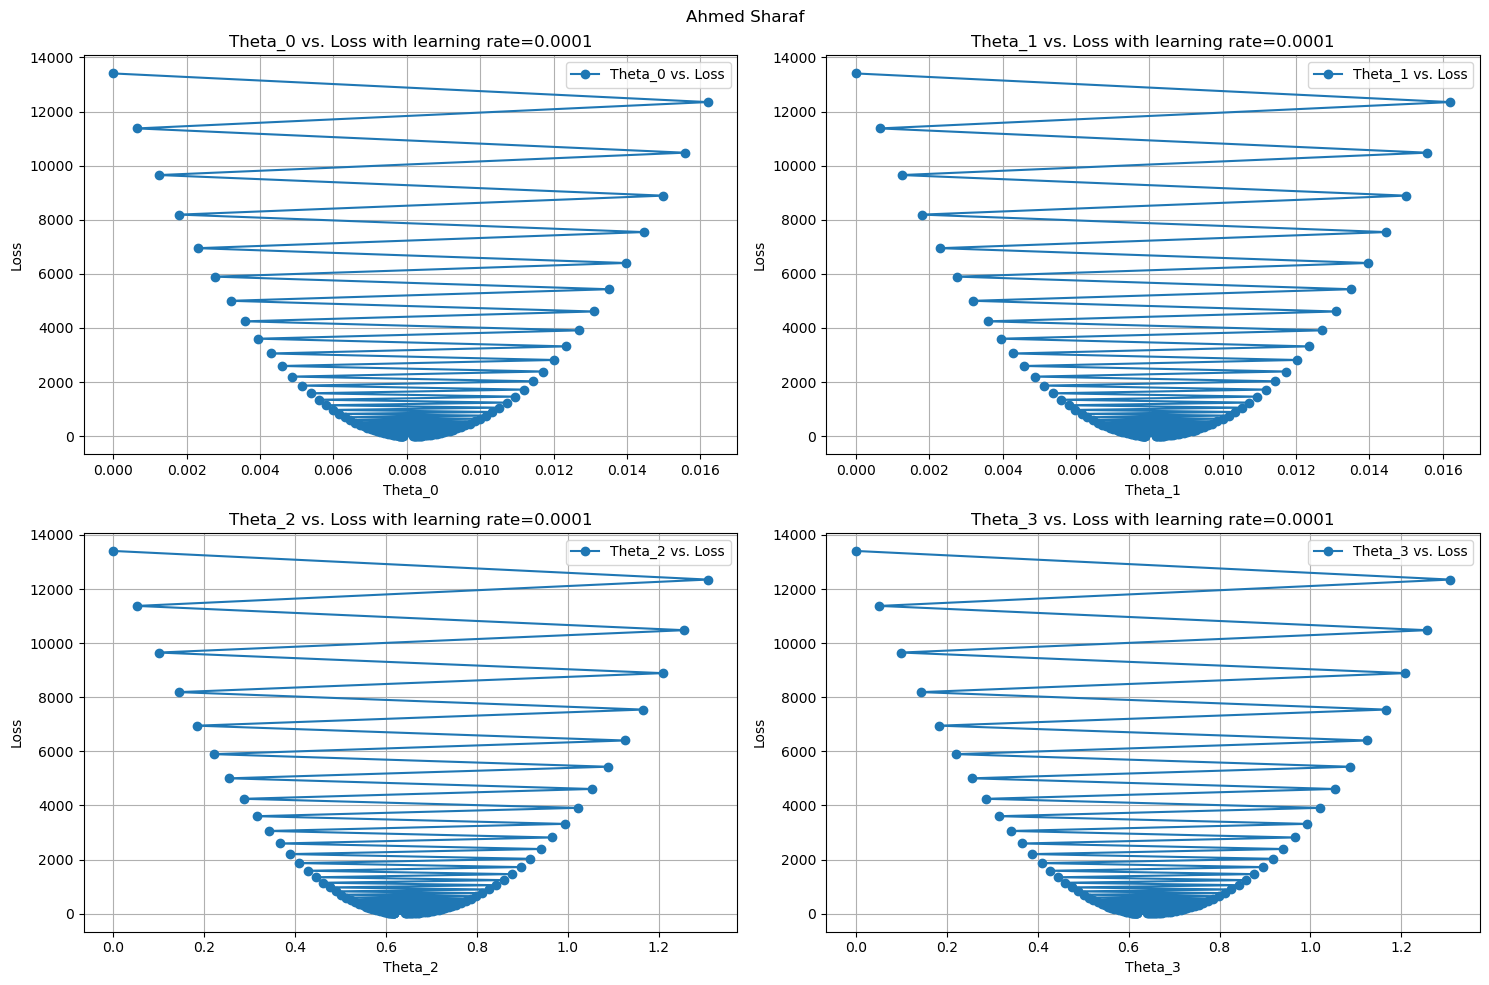

In [107]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 10)
fig.suptitle('Ahmed Sharaf')
theta_ = [theta_0, theta_1, theta_2, theta_3]
count = 0
for i in range(2):
    for j in range(2):
        axs[i, j].plot(theta_[i][:100], c[:100], '-o', label=f'Theta_{count} vs. Loss')
        axs[i, j].set_title(f'Theta_{count} vs. Loss with learning rate=0.0001')
        axs[i, j].set_xlabel(f'Theta_{count}')
        axs[i, j].set_ylabel('Loss')
        axs[i, j].legend()
        axs[i, j].grid(True)
        count += 1
        
fig.tight_layout()
